# Problème des reines sur échiquier

## Genetic algorithm

In [13]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 

## 1. Solutions

- **Solutions** : Toutes les cases sont utilisées
- **Solution** optimales : Il y a 0 conflit

## 2. Implémentation

In [14]:
"""
We init the board as a 2D array of 0
0 means no queen
1 means a queen is present
2 means the cell is attacked by a queen
"""
def board(n):
    return [[0 for _ in range(n)] for _ in range(n)]

def list_to_board(index_list):
    n = len(index_list)
    board = [[0 for _ in range(n)] for _ in range(n)]
    for i, j in enumerate(index_list):
        board[i][j] = 1
    return board

## 3. Fonction objectif

In [15]:
"""
Transform the board to a list of queen
Index = nb line
Value = nb column
"""
def index_queen(board):
    index = []
    for i in range(len(board)):
        for j in range(len(board)):
            if board[i][j] == 1:
                index.append((i, j))
                
    # 0. nb of queens should size board
    if len(index) != len(board):
        return False
    
    return index

"""
Objective function: we want the optimal solution
For that we need to check the diagonal, horizontal and vertical lines
"""
def objective_function(index_list):
    conflicts = 0
    n = len(index_list)
    # 1. No queen in corners
    if index_list[0] == 0:
        conflicts += 1
    if index_list[-1] == n - 1:
        conflicts += 1
    if index_list[0] == n - 1:
        conflicts += 1
    if index_list[-1] == 0:
        conflicts += 1
         
    # 2. A queen is present in the same column
    for i in range(n):
        for j in range(i+1, n):
            if index_list[i] == index_list[j]:
                conflicts += 1
    
    # 3. A queen is present in the same row
    for i in range(n):
        for j in range(i+1, n):
            if abs(index_list[i] - index_list[j]) == abs(i - j):
                conflicts += 1
    return conflicts

## 4. Croisement

In [16]:
"""
Crossing over
we take two parents and we create a child
taking the first half of the first parent
and the second half of the second parent
"""
def crossing_over(index_list1, index_list2):
    n = len(index_list1)
    half = n // 2

    # Child 1: first half from parent 1, rest from parent 2 in order
    child1 = list(index_list1[:half])
    used1 = set(child1)
    # We add the remaining values from the other parent in order
    for val in index_list2:
        if val not in used1:
            child1.append(val)
            used1.add(val)

    # Child 2: first half from parent 2, rest from parent 1 in order
    child2 = list(index_list2[:half])
    used2 = set(child2)
    # We add the remaining values from the other parent in order
    for val in index_list1:
        if val not in used2:
            child2.append(val)
            used2.add(val)

    return child1, child2
    

## 5. Mutation

In [17]:
"""
Permutation of two random values in the list
"""
def mutation(index_list):
    n = len(index_list)
    i, j = rd.sample(range(n), 2)
    index_list[i], index_list[j] = index_list[j], index_list[i]

## 6. Genetic algorithm

In [18]:
def genetic_algorithm(n, population_size=100, generations=1000, mutation_rate=0.1):
    # Initialize population with random permutations
    population = [rd.sample(range(n), n) for _ in range(population_size)]
    
    for generation in range(generations):
        # Calculate fitness for each individual
        fitnesses = [objective_function(ind) for ind in population]
        
        # Check if we have a solution
        min_fitness = min(fitnesses)
        if min_fitness == 0:
            best_index = fitnesses.index(0)
            return population[best_index]
        
        # Selection and reproduction
        new_population = []
        while len(new_population) < population_size:
            # Select two parents using tournament selection
            parent1 = select_parent(population, fitnesses)
            parent2 = select_parent(population, fitnesses)
            
            # Crossover
            child1, child2 = crossing_over(parent1, parent2)
            
            # Mutation
            if rd.random() < mutation_rate:
                mutation(child1)
            if rd.random() < mutation_rate:
                mutation(child2)
            
            new_population.append(child1)
            new_population.append(child2)
        
        population = new_population[:population_size]
    
    # Return the best solution found
    fitnesses = [objective_function(ind) for ind in population]
    best_index = fitnesses.index(min(fitnesses))
    return population[best_index]

def select_parent(population, fitnesses):
    # Tournament selection
    tournament_size = 3
    candidates = rd.sample(range(len(population)), tournament_size)
    best_candidate = min(candidates, key=lambda x: fitnesses[x])
    return population[best_candidate]


## Run

Solution found: [38, 22, 35, 17, 55, 42, 40, 54, 25, 51, 4, 34, 14, 11, 58, 2, 20, 53, 47, 15, 31, 7, 49, 33, 19, 30, 26, 59, 56, 0, 43, 8, 16, 45, 1, 18, 52, 3, 44, 29, 37, 9, 12, 50, 23, 21, 39, 48, 10, 13, 41, 6, 24, 27, 57, 28, 36, 32, 46, 5]
Fitness: 0
Board:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

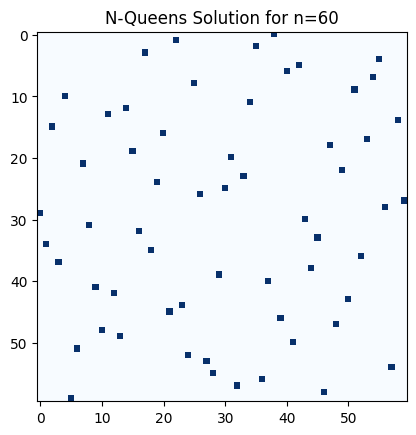

In [20]:
n = 60
solution = genetic_algorithm(n)
print("Solution found:", solution)
print("Fitness:", objective_function(solution))
# Visualize the board
board_sol = list_to_board(solution)
print("Board:")
for row in board_sol:
    print(' '.join(map(str, row)))

# Plot
plt.imshow(board_sol, cmap='Blues')
plt.title(f"N-Queens Solution for n={n}")
plt.show()
